In [26]:
import os
cwd = os.getcwd()
cwd

'/content'

>Download train.csv from here
>
>> https://www.kaggle.com/c/digit-recognizer/data
>
>and unzip it inside a new folder named ***"large_files"***

>$$X \sim N(\mu, \Sigma)$$
>
> $X \in R^{m \times n}$
>
> * $m$: number of examples
>
> * $n$: number of dimensions (for MNIST, $28 \times 28 = 784$ dimensions) 
>
> Mean $\mu \in R^{n}$
>
> Covariance matrix $\Sigma \in [-1,1]^{n \times n}$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import util


In [71]:
X, y = util.get_mnist()

Reading in and transforming data...


In [72]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (42000, 784)
y shape: (42000,)


In [99]:
Xtoy = np.asarray(X[0:4200, :])
ytoy = np.asarray(y[0:4200])

In [119]:
class BayesClassifier:
    def fit(self, X, y):
        # Number of classes
        self.K = len(set(y))
        # Distribution of each class k
        self.gaussians = []
        for k in range(self.K):
            Xk = X[y==k]
            
            mean = np.mean(Xk, axis=0)
            cov  = np.cov(Xk.T)
            gaussian_k = {'mean': mean,
                          'cov' : cov}
            self.gaussians.append(gaussian_k)
    
    def sample_given_y (self, y):
        gaussian_k = self.gaussians[y]
        mean = gaussian_k['mean']
        cov  = gaussian_k['cov']
        return np.random.multivariate_normal(mean, cov)
    
    def sample(self):
        y = np.random.randint(self.K)
        return self.sample_given_y(y)
    

In [120]:
clf = BayesClassifier()
clf.fit(X, y)

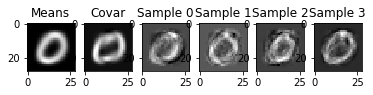

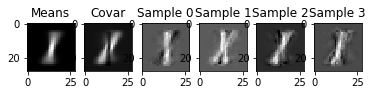

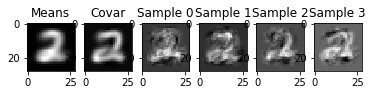

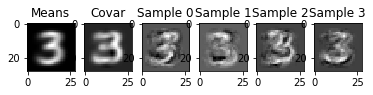

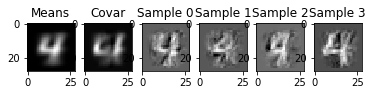

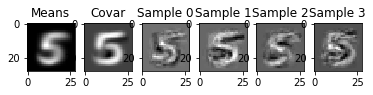

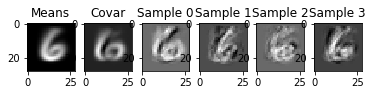

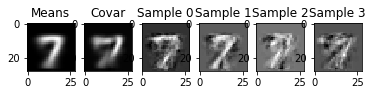

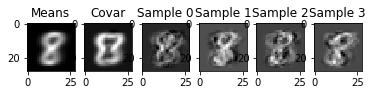

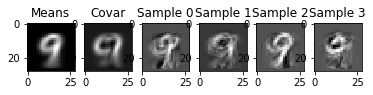

In [139]:
for k in range(clf.K):
    mean   = clf.gaussians[k]['mean']
    
    plt.subplot(1,6,1)
    plt.imshow(mean.reshape(28,28), cmap='gray')
    plt.title('Means')
    
    cov   = clf.gaussians[k]['cov'].reshape(28, 28, 784).mean(axis=2)
    
    plt.subplot(1,6,2)
    plt.imshow(cov, cmap='gray')
    plt.title('Covar')
    
    for i in range(4):
        sample = clf.sample_given_y(k)
        plt.subplot(1, 6, 3+i)
        plt.imshow(sample.reshape(28,28), cmap='gray')
        plt.title('Sample '+str(i))
    plt.show()
    

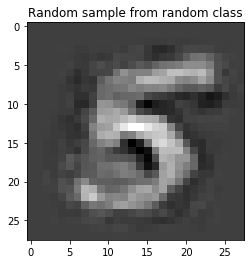

In [144]:
sample = clf.sample()

plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title('Random sample from random class')
plt.show()